In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy import linalg, optimize, spatial
from hdlogistic import *

In [3]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Model
$Y \sim logit( \sum_{i=1}^p \beta_i X_i)$

## i.i.d cases

Case 1: Polynomial Sparsity

In [57]:
n = 200
p = 5*n
m = 8

X = np.random.randn(n,p)

model_true = np.random.choice(p, m, replace=False)
beta_true = np.zeros(p)
beta_nonzero = np.random.randn(m)*3
beta_true[model_true] = beta_nonzero

print('model_true: ',model_true)
print('beta_nonzero: ',beta_nonzero)

model_true:  [1971  662  318  738 2490 1860 2368 2319]
beta_nonzero:  [-0.05132839  2.94453348  1.21372921  1.82599687  2.50221502 -2.08735199
 -3.42598548 -0.49499827]


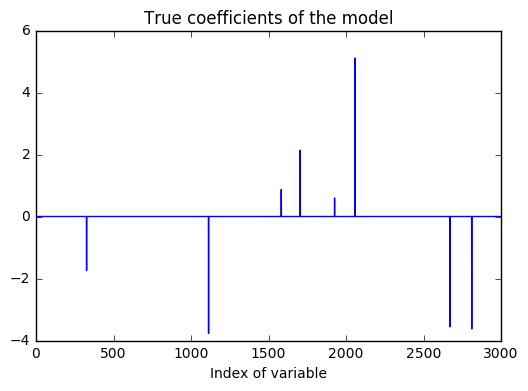

In [5]:
plt.plot(beta_true)
plt.xlabel('Index of variable')
plt.title('True coefficients of the model')
plt.show()

In [6]:
y = np.float64(np.random.rand(n) < 
               np.exp(X @ beta_true)/(1+np.exp(X @ beta_true)))

## CGA+HDIC+Trim

In [7]:
hdLogisticReg = HighDimensionalLogisticRegression(fit_intercept=False,
                                                  wn = 0.5)
hdLogisticReg.fit(X,y)

HighDimensionalLogisticRegression(fit_intercept=False, ic='HQIC', kn=1.0,
                 method='dogleg', options=None, tol=1e-08, wn=0.5)

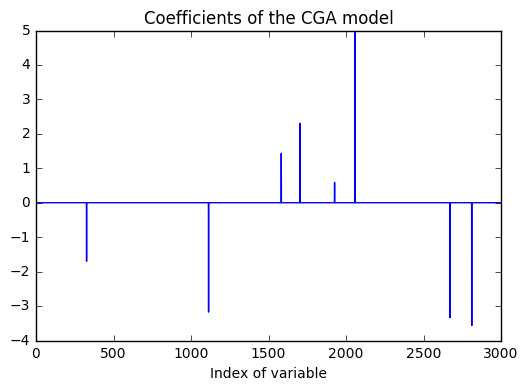

In [8]:
plt.plot(hdLogisticReg.coef_)
plt.xlabel('Index of variable')
plt.title('Coefficients of the CGA model')
plt.show()

## L2 Penalty

In [9]:
clf_l2_LR = LogisticRegression(C=0.029, penalty='l2', tol=0.01,
                               fit_intercept=False)
clf_l2_LR.fit(X, y)
coef_l2_LR = clf_l2_LR.coef_.ravel()

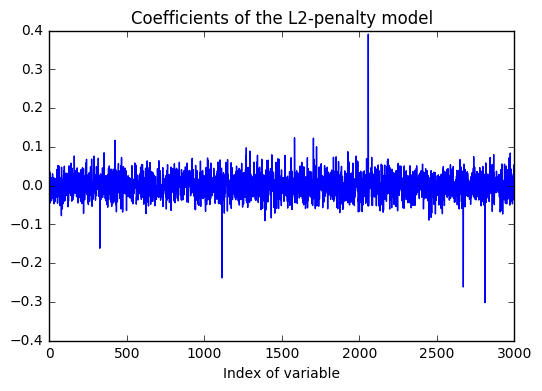

In [10]:
plt.plot(coef_l2_LR)
plt.xlabel('Index of variable')
plt.title('Coefficients of the L2-penalty model')
plt.show()

## L1 Penalty

In [11]:
clf_l1_LR = LogisticRegression(C=0.03, penalty='l1', tol=0.01,
                               fit_intercept=False)
clf_l1_LR.fit(X, y)
coef_l1_LR = clf_l1_LR.coef_.ravel()

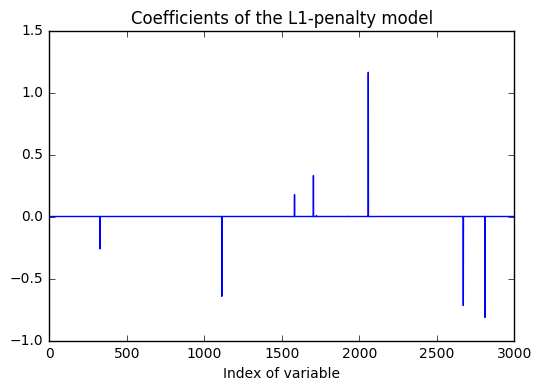

In [12]:
plt.plot(coef_l1_LR)
plt.xlabel('Index of variable')
plt.title('Coefficients of the L1-penalty model')
plt.show()

## Summary

In [13]:
print('model_true: ', np.sort(model_true))
print('model_CGA_: ', np.sort(hdLogisticReg.model_))
print('model_L_1_: ', np.where(np.abs(coef_l1_LR) > 1e-8)[0])

model_true:  [ 326 1113 1582 1704 1926 2058 2671 2811]
model_CGA_:  [ 326 1113 1582 1704 1926 2058 2671 2811]
model_L_1_:  [ 326 1113 1582 1704 1724 1926 2058 2671 2811]


# Equally correlated case

In [14]:
n = 800
p = 3000
m = 8
eta = 0.3

X = np.random.randn(n,p)
w = np.random.randn(n,1)
X = X + eta * w

print('model_true: ',model_true)
print('beta_nonzero: ',beta_nonzero)

model_true:  [1704 2811 1582  326 1926 1113 2671 2058]
beta_nonzero:  [ 2.13766416 -3.62752186  0.87187892 -1.74393316  0.59462659 -3.77389897
 -3.55780863  5.10953183]


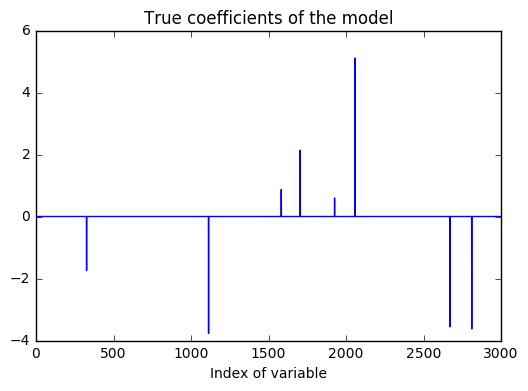

In [15]:
plt.plot(beta_true)
plt.xlabel('Index of variable')
plt.title('True coefficients of the model')
plt.show()

In [16]:
y = np.float64(np.random.rand(n) <
               np.exp(X @ beta_true)/(1+np.exp(X @ beta_true)))

## CGA+HDIC+Trim

In [21]:
hdLogisticReg = HighDimensionalLogisticRegression(fit_intercept=False,
                                                  wn = 0.4)
hdLogisticReg.fit(X,y)

HighDimensionalLogisticRegression(fit_intercept=False, ic='HQIC', kn=1.0,
                 method='dogleg', options=None, tol=1e-08, wn=0.4)

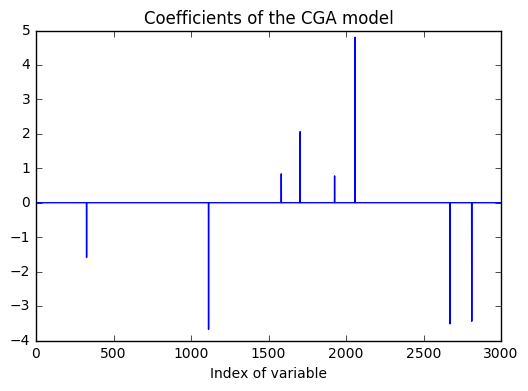

In [22]:
plt.plot(hdLogisticReg.coef_)
plt.xlabel('Index of variable')
plt.title('Coefficients of the CGA model')
plt.show()

## L1 Penalty

In [48]:
clf_l1_LR = LogisticRegression(C=0.07, penalty='l1', tol=0.01,
                               fit_intercept=False)
clf_l1_LR.fit(X, y)
coef_l1_LR = clf_l1_LR.coef_.ravel()

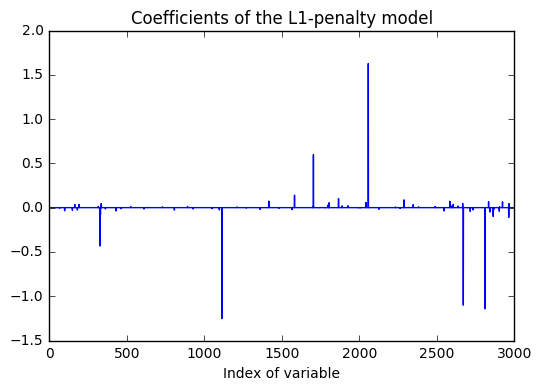

In [49]:
plt.plot(coef_l1_LR)
plt.xlabel('Index of variable')
plt.title('Coefficients of the L1-penalty model')
plt.show()

## L2 Penalty

In [52]:
clf_l2_LR = LogisticRegression(C=0.07, penalty='l2', tol=0.01,
                               fit_intercept=False)
clf_l2_LR.fit(X, y)
coef_l2_LR = clf_l2_LR.coef_.ravel()

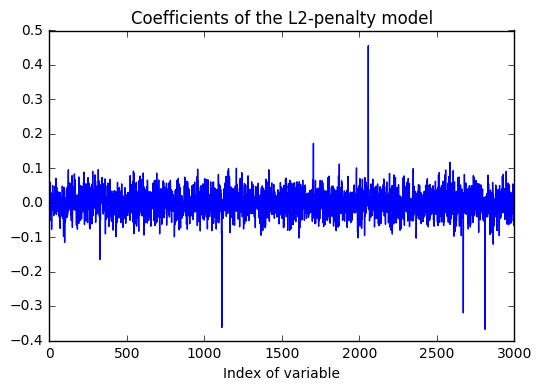

In [53]:
plt.plot(coef_l2_LR)
plt.xlabel('Index of variable')
plt.title('Coefficients of the L2-penalty model')
plt.show()

## Summary

In [54]:
print('model_true: ', np.sort(model_true))
print('model_CGA_: ', np.sort(hdLogisticReg.model_))
print('model_L_1_: ', np.where(np.abs(coef_l1_LR) > 1e-8)[0])

model_true:  [ 326 1113 1582 1704 1926 2058 2671 2811]
model_CGA_:  [ 326 1113 1582 1704 1926 2058 2671 2811]
model_L_1_:  [  66   99  149  164  181  192  316  325  326  330  335  362  430  463  526
  611  633  730  807  892  927 1049 1097 1113 1211 1271 1359 1361 1416 1482
 1566 1582 1700 1704 1737 1779 1799 1800 1802 1805 1866 1889 1926 1927 1991
 2005 2043 2058 2127 2233 2263 2288 2348 2382 2489 2508 2546 2584 2594 2606
 2637 2667 2671 2697 2716 2734 2811 2834 2844 2864 2870 2903 2905 2923 2924
 2964 2966]


In [55]:
np.in1d(model_true, np.where(np.abs(coef_l1_LR) > 1e-8)[0])

array([ True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)